# Nonlinear Dynamics HW02
-----
<Strong> Done By: MO'ath Yousef 

## Problem 3.3

(a) Rewrite this equation as a linear first order system by setting $\dot{x} = y$ 

$$
\dot{x} = y
$$

$$
\dot{y} = -25x - \mu y 
$$

(b) Sketch phase portraits when (i) $\mu = -8$, (ii) $\mu = 0$, (iii) $\mu = 8$, and (iii) $\mu = 26$.

For us to understand the system we have to find the following first before plotting the trajectories. 
* Find the equilibriam point(s).
* Find the Eigen Values and Vectors 
* We need to classify.
* Finally plot trajectories

The Main Function is below.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def main(mu):
    A = np.array([[0,1],[-25,-mu]])
    
    print('The SS Matrix is: \n',A)
    print("System's Eigenvalues are:", np.linalg.eig(A)[0])
    EV1 = np.linalg.eig(A)[1][:, 0]
    EV2 = np.linalg.eig(A)[1][:, 1]
    print("System's Eigenvectors: \n EV1 =", EV1, "  EV2 =", EV2)

    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = X[1]
        dydt = -25*X[0] -mu*X[1]
    
        return np.array([ dxdt , dydt ])

    fig, ax = plt.subplots(figsize=(10,7))

    x = np.linspace(-1, 1, 30)
    y = np.linspace(-1, 1, 30)
    X1 , Y1  = np.meshgrid(x, y)  
    derX1, derY1 = derivatives([X1, Y1])                        
 
    ax.quiver(X1, Y1, derX1, derY1, pivot='mid')
    ax.streamplot(X1, Y1, derX1, derY1, density = 1)

    ts = np.linspace(0, 5, 500)
    ic = np.linspace(-1, 1, 15)
    for s in ic:
        for r in ic:
            x0 = [r, s]
            xs = odeint(derivatives, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-')
    ts = np.linspace(0, -5, 500)
    ic = np.linspace(-1, 1, 15)
    for s in ic:
        for r in ic:
            x0 = [r, s]
            xs = odeint(derivatives, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-')

    ax.set_title("Phase Portrait", fontsize=25)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize='20')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    #ax.legend()
    ax.grid("minor")


    
    return 

The SS Matrix is: 
 [[  0   1]
 [-25   8]]
System's Eigenvalues are: [4.+3.j 4.-3.j]
System's Eigenvectors: 
 EV1 = [0.15689291-0.11766968j 0.98058068+0.j        ]   EV2 = [0.15689291+0.11766968j 0.98058068-0.j        ]


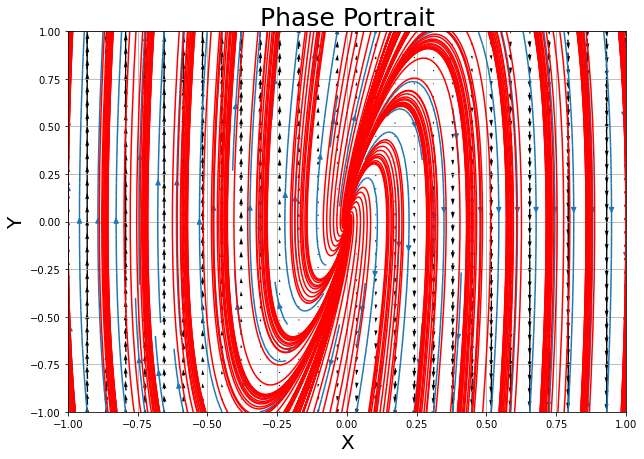

In [59]:
main(-8)

** For the above case ($\mu=-8$), the eigenvalues are complex with positive real parts. Thus, it is classified as Unstable Focus. **

The SS Matrix is: 
 [[  0   1]
 [-25   0]]
System's Eigenvalues are: [0.+5.j 0.-5.j]
System's Eigenvectors: 
 EV1 = [0.        -0.19611614j 0.98058068+0.j        ]   EV2 = [0.        +0.19611614j 0.98058068-0.j        ]


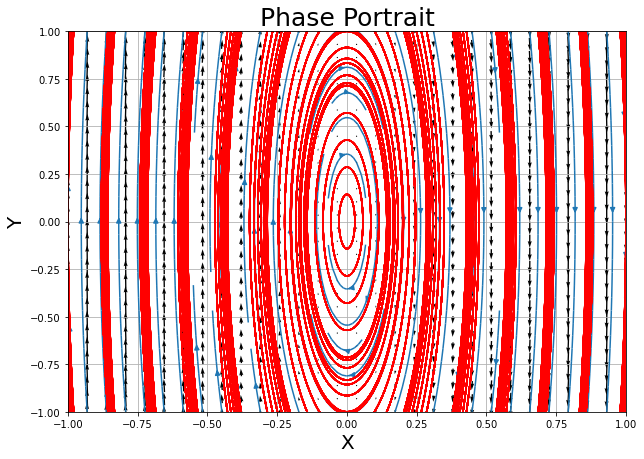

In [60]:
main(0)

** For the above case ($\mu=0$), the eigenvalues are purely imagionary. Thus, it is classified as Center. **

The SS Matrix is: 
 [[  0   1]
 [-25  -8]]
System's Eigenvalues are: [-4.+3.j -4.-3.j]
System's Eigenvectors: 
 EV1 = [-0.15689291-0.11766968j  0.98058068+0.j        ]   EV2 = [-0.15689291+0.11766968j  0.98058068-0.j        ]


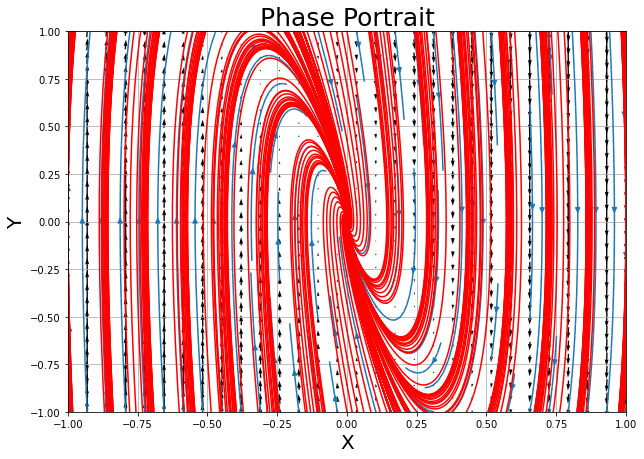

In [61]:
main(8)

** For the above case ($\mu=8$), the eigenvalues are complex with negative real parts. Thus, it is classified as Stable Focus. **

The SS Matrix is: 
 [[  0   1]
 [-25 -26]]
System's Eigenvalues are: [ -1. -25.]
System's Eigenvectors: 
 EV1 = [ 0.70710678 -0.70710678]   EV2 = [-0.03996804  0.99920096]


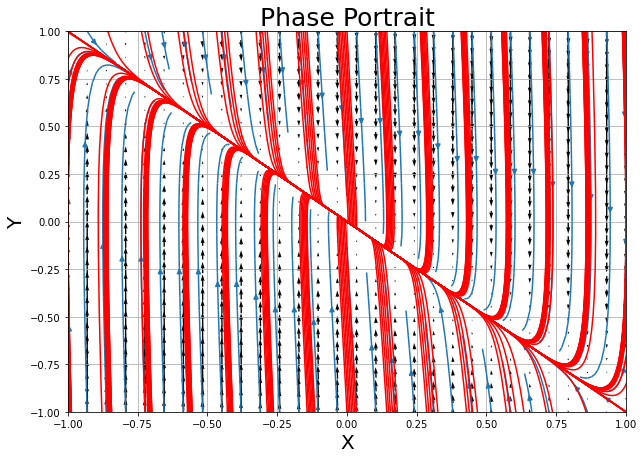

In [62]:
main(26)

** For the above case ($\mu=26$), the eigenvalues are real and negative. Thus, it is classified as Stable Node. **

(c) Describe the dynamical behavior in each case given that $x(0) = 1$ and $\dot{x} = 0$.

Below is the dynamic behavior function 

In [63]:
def DB(mu,x0):
    t = np.linspace(0,4, 500)
    
    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = X[1]
        dydt = -25*X[0] -mu*X[1]
    
        return np.array([ dxdt , dydt ])
    
    XY = odeint(derivatives, x0, t)

    fig = plt.figure(figsize=(15, 6))

    ax1 = fig.add_subplot(121)
    ax1.plot(t, XY[:, 0], label = 'X')
    ax1.plot(t, XY[:, 1], label = "Y")
    ax1.grid()
    ax1.set_xlabel("Time- $t$ [s]")
    ax1.set_ylabel('Response')
    #ax1.set_ylim(0,30)
    ax1.set_xlim(0,4)
    ax1.legend(loc = "best")
    ax1.set_title("Dynamic Response")

    ax2 = fig.add_subplot(122)
    ax2.plot(XY[:, 0], XY[:, 1], "-")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.grid()
    ax2.set_title("Phase Portrait (Plane View)");

    
    return 

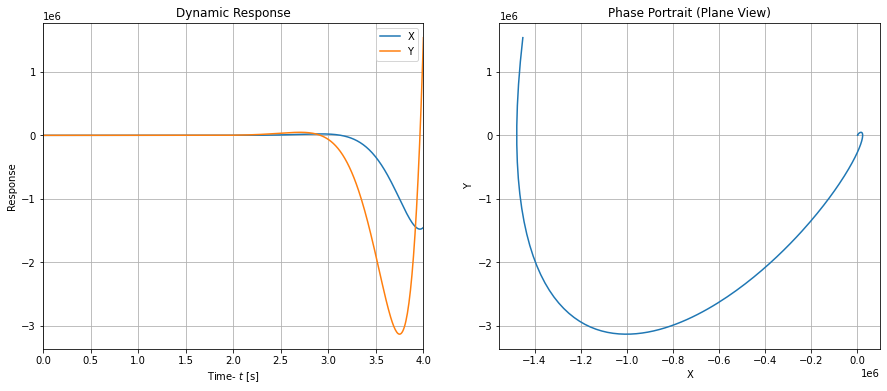

In [64]:
x0 = [0.01,1]
DB(-8,x0)

** The system is behaving like the oscillations are starting to appear or grow over time which is something impossible to happen. **

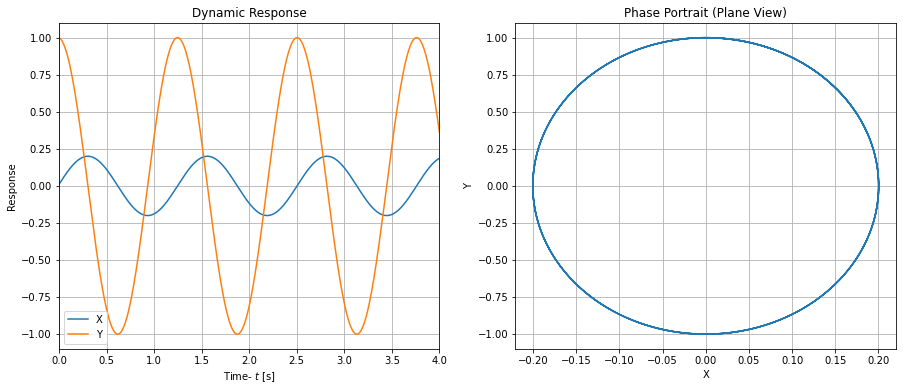

In [65]:
x0 = [0.01,1]
DB(0,x0)

** As can be seen, the system is under regular oscillations **

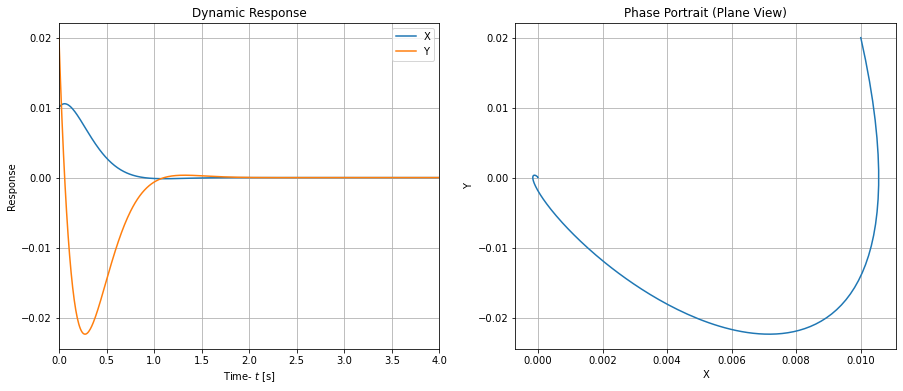

In [66]:
x0 = [0.01,0.02]
DB(8,x0)

** The system is over damped **

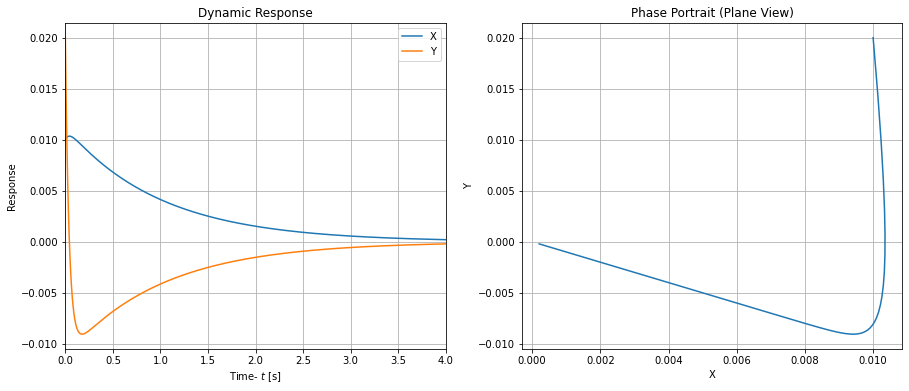

In [67]:
x0 = [0.01,0.02]
DB(26,x0)

** The system looks critically damping, which is confusing knowing that in vibrations, when the damping ration greater than 1 is considered over damping and when it is exactly 1, it is called critical damping **

# -----------------

# Problem 4.3

We are given the following system: 
$$
\dot{x} = 2x - x^2 - xy = x(2 - x - y) 
$$
$$
\dot{y} = -y - y^2 +xy = y(-1 - y + x) 
$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sm
from scipy import integrate

## 1- First we find critical points

In [2]:
## Note: xs and ys are x and y in the equations given. I chose them to not conflict with other variables assignment 

## Critical points are found by equating Xdot and Ydot to zero. 
## I am going to use sumbols offered by sciby to find them. Much easier than hand calcualtions. 

xs, ys = sm.symbols('xs, ys', negative=False)

# Change these according to your equation of interest 
Xdot = 2*xs - xs**2 - xs*ys                                 
Ydot = - ys - ys**2 + xs*ys                                 

# Set Xdot and Ydot to equal zero
XdotZer = sm.Eq(Xdot, 0)
YdotZer = sm.Eq(Ydot, 0)

# Find critical points 
CriticalPoints = sm.solve( (XdotZer, YdotZer), xs, ys )
print('Critical points to be examined are %s ' % CriticalPoints)

Critical points to be examined are [(0, 0), (3/2, 1/2), (2, 0)] 


* If the eigenvalues are distinct, real, and positive, then the critical point
is called an unstable node
* If the eigenvalues are distinct, real, and negative, then the critical point
is called a stable node
* If one eigenvalue is positive and the other negative, then the critical
point is called a saddle point or col.

## 2- Check characteristics of critical points 

In [3]:
def CheckStability(x,y):
    
    JM = JacobianM.subs([ (xs, x), (ys, y) ])
    # used float64 to avoid errors dealing with fractions found in previous step
    JM = np.float64(JM)
    Eig = np.linalg.eig(JM)
    
    print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
    if (Eig[0][0] < 0 and Eig[0][1] < 0):
        
        print('==================> It is sink. Thus, stable')
        
    if (Eig[0][0] > 0 and Eig[0][1] > 0):
        
        print('==================> It is source. Thus, unstable')
        
    if (Eig[0][0] > 0 and Eig[0][1] < 0):
        
        print('==================> It is saddle or col. Thus, unstable')
        
    if (Eig[0][0] < 0 and Eig[0][1] > 0):
        
        print('==================> It is saddle or col. Thus, unstable')
        
    print('\n')

    
JM2 = sm.Matrix([ Xdot, Ydot ])
JM3 = sm.Matrix([ xs, ys ])
JacobianM = JM2.jacobian(JM3)

print('\n Jacobian %s' % JacobianM)
print('\n')


for x,y in CriticalPoints:
    CheckStability(np.float64(x),np.float64(y))


 Jacobian Matrix([[-2*xs - ys + 2, -xs], [ys, xs - 2*ys - 1]])


Eigenvalues of (0.0, 0.0) are 2.0 and -1.0:
==================> It is saddle or col. Thus, unstable


Eigenvalues of (1.5, 0.5) are (-0.9999999999999999+0.7071067811865475j) and (-0.9999999999999999-0.7071067811865475j):
==================> It is sink. Thus, stable


Eigenvalues of (2.0, 0.0) are -2.0 and 1.0:
==================> It is saddle or col. Thus, unstable




## 3- Visualize Action 

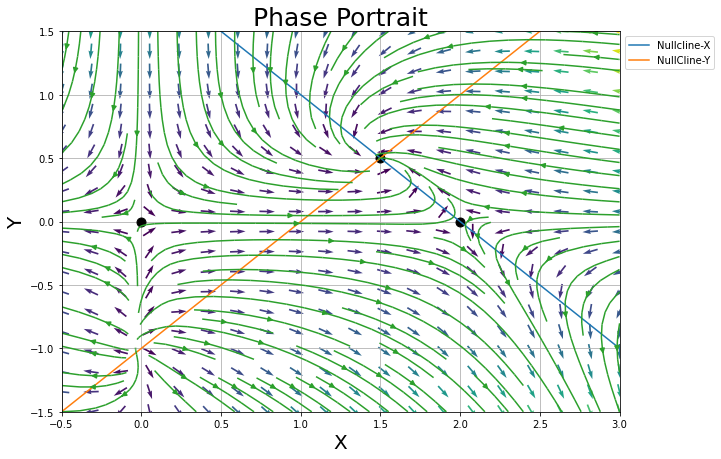

In [4]:
# Define function for rates given to be used in the ode 
def derivatives(X, t=0):
    # X[0] = x 
    # X[1] = y
    dxdt = 2*X[0] - X[0]**2 - X[0]*X[1]
    dydt = - X[1] - X[1]**2 + X[0]*X[1]
    
    return np.array([ dxdt , dydt ])


# Here we plot, the critical points to be visible on the plot. 
# We need how actually they look. To verify our pervious findings 
fig, ax = plt.subplots(figsize=(10,7))
for CP in CriticalPoints:
    ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


# First we need to have a grid and then determine the dirction by .
# The range of x was chosen to allow me see the full interaction between all critical points 
x = np.linspace(-0.5, 3, 20)
y = np.linspace(-1.5, 1.5, 20)
X1 , Y1  = np.meshgrid(x, y)  
derX1, derY1 = derivatives([X1, Y1])                        

# Normalization of vectors is a good idea to maintain a equal length on the plot. 
Norm = (np.hypot(derX1, derY1))                        
Norm[ Norm == 0] = 1.                                
derX1 /= Norm                                       
derY1 /= Norm

# Plot nullclines
# Basically where dx_dt and dy_dt are equal to zero
# y = 2 - x
# y = x - 1 

xplot = np.linspace(-0.5,3,50)
plt.plot(xplot,2-xplot, label="Nullcline-X")
plt.plot(xplot,xplot-1, label="NullCline-Y")

ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
ax.streamplot(X1, Y1, derX1, derY1, density = 1)
ax.set_title("Phase Portrait", fontsize=25)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize='20')
ax.set_xlim(-0.5,3)
ax.set_ylim(-1.5,1.5)
#ax.legend()
ax.legend(bbox_to_anchor=(1,1))
ax.grid("minor")



## 4- Visualize Systems Dynamics 

In [5]:
# Here I am developing a new skill by trying to solve without built in integration functions.

def derivative(X, t):
    x, y = X
    dotx = x*(2 - x - y)     # Given in the problem    
    doty = y*(-1 - y + x)    # Given in the peoblem            
    return np.array([dotx, doty])                   

def solver(der, iv, t): # iv: Initial Value
    deltat = t[1] - t[0]
    Nt = len(t)
    X  = np.zeros([Nt, len(iv)])
    X[0] = iv
    for i in range(Nt-1):
        X[i+1] = X[i] + der(X[i], t[i]) * deltat
    return X


def Condition(IV):
    # I found out that some systems needs a carful consideration in terms of time simulation, they might be tricky espicially 
    # if the motion has large/small interaction
    t = np.linspace(0,30, 1000)
    
    XY = solver(derivative, IV, t)

    fig = plt.figure(figsize=(15, 6))

    ax1 = fig.add_subplot(121)
    ax1.plot(t, XY[:, 0], label = 'X')
    ax1.plot(t, XY[:, 1], label = "Y")
    ax1.grid()
    ax1.set_xlabel("Time- $t$ [s]")
    ax1.set_ylabel('Response')
    #ax1.set_ylim(0,30)
    ax1.set_xlim(0,30)
    ax1.legend(loc = "best")
    ax1.set_title("Dynamic Response")

    ax2 = fig.add_subplot(122)
    ax2.plot(XY[:, 0], XY[:, 1], "-")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.grid()
    ax2.set_title("Phase Portrait (Plane View)");

## 5- Test Different Initial Conditions

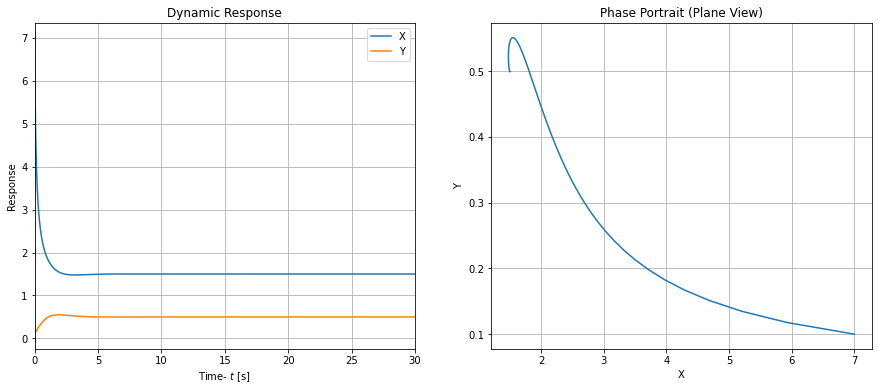

In [6]:
# Choose initial conditions
IV = [7, 0.1] # x0 and y0
Condition(IV)

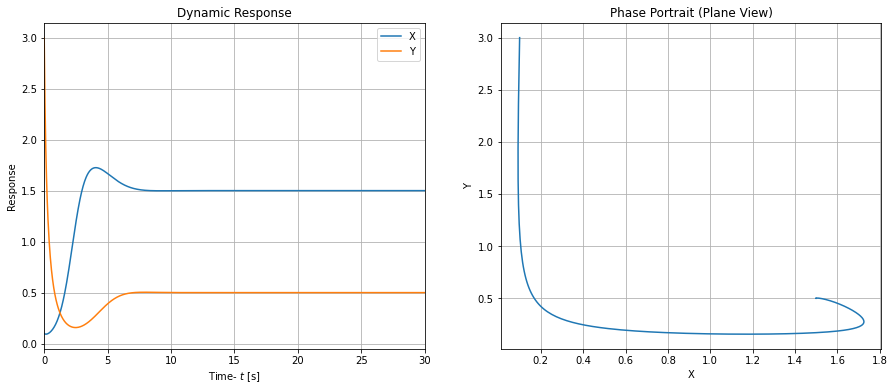

In [7]:
# Choose initial conditions
IV = [0.1, 3] # x0 and y0
Condition(IV)

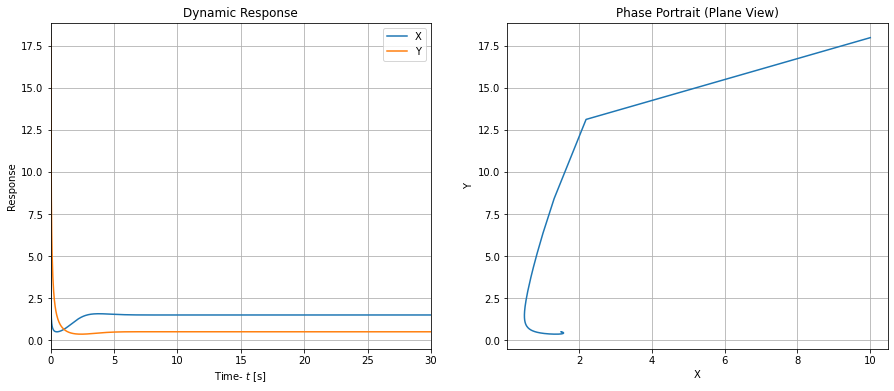

In [8]:
# Choose initial conditions
IV = [10, 18] # x0 and y0
Condition(IV)

## 6- Summary

We summarize this model as having three critical points two of which are saddle or cols and the other is stable focus. We understand that this model is actually a preditor-prey. Looking into the population behaviour, we conclude that both coexist and examining multiple initial conditions led us to know that they reach constant population values. 

# Problem 4.7

$$ 
\dot{x} = x(x-x^2-y)
$$

$$
\dot{y} = y(x-0.6)
$$

I will just update the above functions to match this one 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sm
from scipy import integrate

In [2]:
## Note: xs and ys are x and y in the equations given. I chose them to not conflict with other variables assignment 

## Critical points are found by equating Xdot and Ydot to zero. 
## I am going to use sumbols offered by sciby to find them. Much easier than hand calcualtions. 

xs, ys = sm.symbols('xs, ys', negative=False)

# Change these according to your equation of interest 
Xdot = xs*(xs-xs**2-ys)                                         
Ydot = ys*(xs-0.6)                                            

# Set Xdot and Ydot to equal zero
XdotZer = sm.Eq(Xdot, 0)
YdotZer = sm.Eq(Ydot, 0)

# Find critical points 
CriticalPoints = sm.solve( (XdotZer, YdotZer), xs, ys )
print('Critical points to be examined are %s ' % CriticalPoints)

Critical points to be examined are [(0.0, 0.0), (0.600000000000000, 0.240000000000000), (1.00000000000000, 0.0)] 


* If the eigenvalues are distinct, real, and positive, then the critical point
is called an unstable node
* If the eigenvalues are distinct, real, and negative, then the critical point
is called a stable node
* If one eigenvalue is positive and the other negative, then the critical
point is called a saddle point or col.

In [3]:
def CheckStability(x,y):
    
    JM = JacobianM.subs([ (xs, x), (ys, y) ])
    # used float64 to avoid errors dealing with fractions found in previous step
    JM = np.float64(JM)
    Eig = np.linalg.eig(JM)
    
    print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
    if (Eig[0][0] < 0 and Eig[0][1] < 0):
        
        print('==================> It is sink. Thus, stable')
        
    if (Eig[0][0] > 0 and Eig[0][1] > 0):
        
        print('==================> It is source. Thus, unstable')
        
    if (Eig[0][0] > 0 and Eig[0][1] < 0):
        
        print('==================> It is saddle. Thus, unstable')
        
    if (Eig[0][0] < 0 and Eig[0][1] > 0):
        
        print('==================> It is saddle point or col')
        
    print('\n')

    
JM2 = sm.Matrix([ Xdot, Ydot ])
JM3 = sm.Matrix([ xs, ys ])
JacobianM = JM2.jacobian(JM3)

print('\n Jacobian %s' % JacobianM)
print('\n')


for x,y in CriticalPoints:
    CheckStability(np.float64(x),np.float64(y))


 Jacobian Matrix([[-xs**2 + xs*(1 - 2*xs) + xs - ys, -xs], [ys, xs - 0.6]])


Eigenvalues of (0.0, 0.0) are 0.0 and -0.6:


Eigenvalues of (0.6, 0.24) are (-0.05999999999999997+0.374699879903904j) and (-0.05999999999999997-0.374699879903904j):
==================> It is sink. Thus, stable


Eigenvalues of (1.0, 0.0) are -1.0 and 0.4:
==================> It is saddle point or col




Point (0,0) is saddle or col

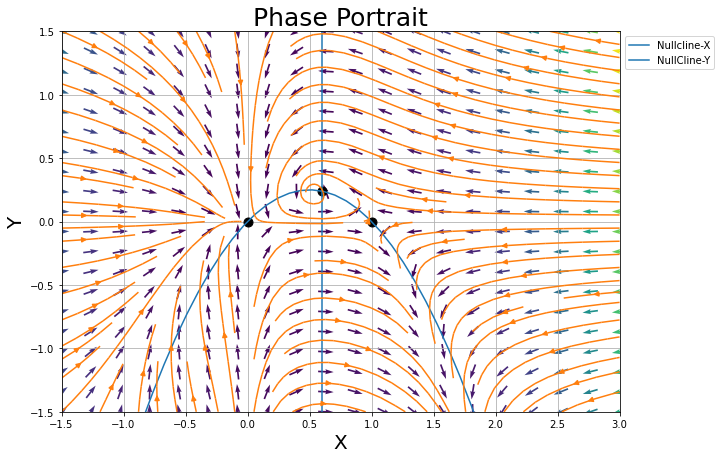

In [4]:
# Define function for rates given to be used in the ode 
def derivatives(X, t=0):
    # X[0] = x 
    # X[1] = y
    dxdt = X[0]*(X[0]-X[0]**2-X[1])     
    dydt = X[1]*(X[0]-0.6)
    
    return np.array([ dxdt , dydt ])


# Here we plot, the critical points to be visible on the plot. 
# We need how actually they look. To verify our pervious findings 
fig, ax = plt.subplots(figsize=(10,7))
for CP in CriticalPoints:
    ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


# First we need to have a grid and then determine the dirction by .
# The range of x was chosen to allow me see the full interaction between all critical points 
x = np.linspace(-1.5, 3, 20)
y = np.linspace(-1.5, 1.5, 20)
X1 , Y1  = np.meshgrid(x, y)  
derX1, derY1 = derivatives([X1, Y1])                        

# Normalization of vectors is a good idea to maintain a equal length on the plot. 
Norm = (np.hypot(derX1, derY1))                        
Norm[ Norm == 0] = 1.                                
derX1 /= Norm                                       
derY1 /= Norm

# Plot nullclines
# Basically where dx_dt and dy_dt are equal to zero
# y = 2 - x
# y = x - 1 

xplot = np.linspace(-1.5,3,50)
plt.plot(xplot, xplot - xplot**2 , label="Nullcline-X")
plt.axvline(x = 0.6, label="NullCline-Y")

ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
ax.streamplot(X1, Y1, derX1, derY1, density = 1)
ax.set_title("Phase Portrait", fontsize=25)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize='20')
ax.set_xlim(-1.5,3)
ax.set_ylim(-1.5,1.5)
#ax.legend()
ax.legend(bbox_to_anchor=(1,1))
ax.grid("minor")


In [5]:
# Here I am developing a new skill by trying to solve without built in integration functions.

def derivative(X, t):
    x, y = X
    dotx = x*(x-x**2-y)     # Given in the problem    
    doty = y*(x-0.6)    # Given in the peoblem            
    return np.array([dotx, doty])                   

def solver(der, iv, t): # iv: Initial Value
    deltat = t[1] - t[0]
    Nt = len(t)
    X  = np.zeros([Nt, len(iv)])
    X[0] = iv
    for i in range(Nt-1):
        X[i+1] = X[i] + der(X[i], t[i]) * deltat
    return X


def Condition(IV):
    # I found out that some systems needs a carful consideration in terms of time simulation, they might be tricky espicially 
    # if the motion has large/small interaction
    t = np.linspace(0,70, 1000)
    
    XY = solver(derivative, IV, t)

    fig = plt.figure(figsize=(15, 6))

    ax1 = fig.add_subplot(121)
    ax1.plot(t, XY[:, 0], label = 'X')
    ax1.plot(t, XY[:, 1], label = "Y")
    ax1.grid()
    ax1.set_xlabel("Time- $t$ [s]")
    ax1.set_ylabel('Response')
    #ax1.set_ylim(0,30)
    ax1.set_xlim(0,70)
    ax1.legend(loc = "best")
    ax1.set_title("Dynamic Response")

    ax2 = fig.add_subplot(122)
    ax2.plot(XY[:, 0], XY[:, 1], "-")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.grid()
    ax2.set_title("Phase Portrait (Plane View)");

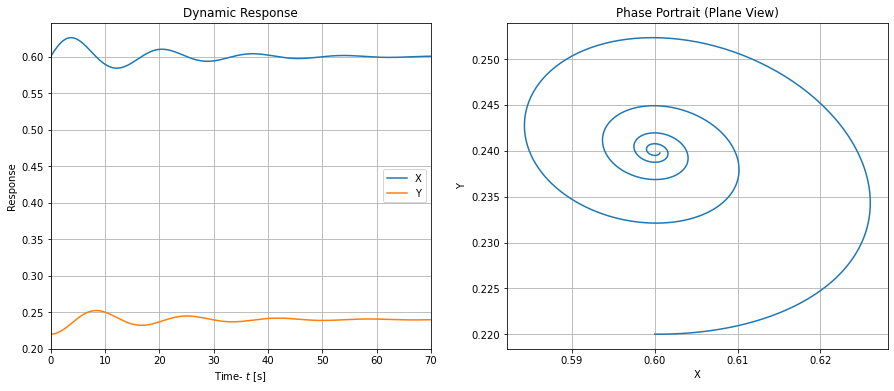

In [6]:
# Choose initial conditions
IV = [0.6, 0.22] # x0 and y0
Condition(IV)

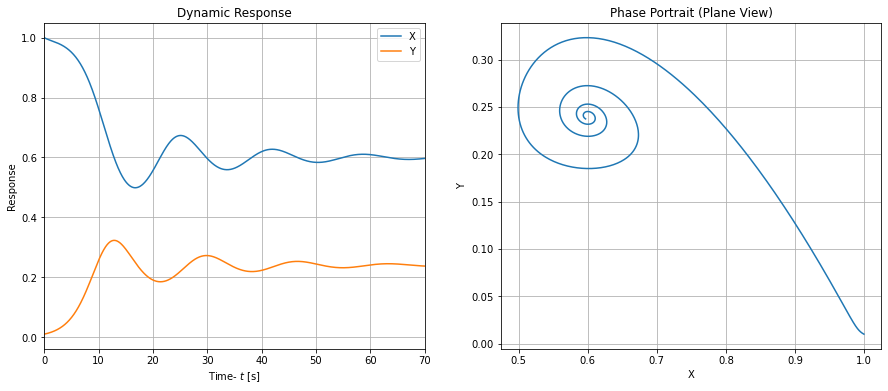

In [7]:
# Choose initial conditions
IV = [1, 0.01] # x0 and y0
Condition(IV)

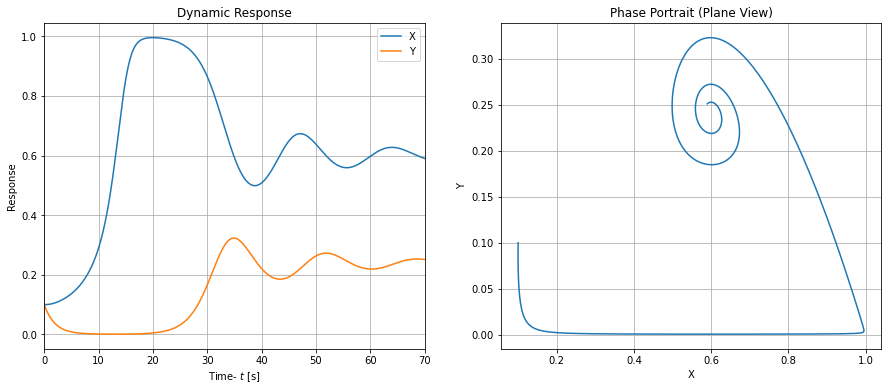

In [8]:
# Choose initial conditions
IV = [0.1, 0.1] # x0 and y0
Condition(IV)

## Summary

We summarize this model as having three critical points two of which are saddle or col and the other is stable focus. We understand that this model is actually a preditor-prey. Looking into the population behaviour, we conclude that both coexist and examining multiple initial conditions led us to know that they reach constant population values.